Dataset Head:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN

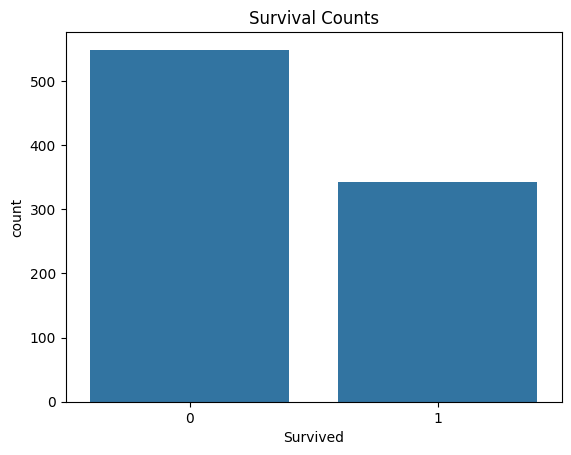


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179


Confusion Matrix:
[[91 14]
 [18 56]]


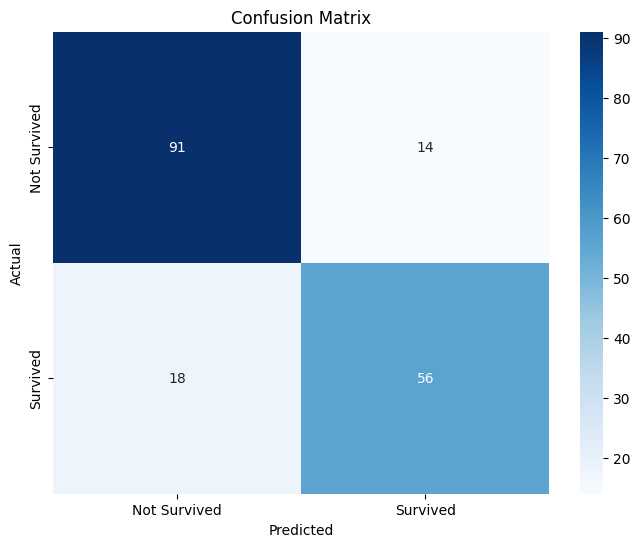

In [3]:
# Import Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load the Titanic dataset
data = pd.read_csv('Titanic-Dataset.csv')

print("Dataset Head:")
print(data.head())

# Check for missing values and general info
print("\nData Info:")
print(data.info())
print("\nMissing Values:")
print(data.isnull().sum())

# Visualize the survival rate
sns.countplot(x='Survived', data=data)
plt.title('Survival Counts')
plt.show()

# Fill missing values for 'Age' with the median
data['Age'] = data['Age'].fillna(data['Age'].median())

# Fill missing values for 'Embarked' with the mode
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

# Drop columns that won't be used for prediction
data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Convert categorical variables into dummy/indicator variables
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

# Define features and target variable
X = data.drop('Survived', axis=1)  # Features
y = data['Survived']  # Target variable


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Step 8: Evaluate the Model
# Make predictions on the test set
y_pred = model.predict(X_test)

# Generate a classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(confusion_mat)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()